In [1]:
from lxml import html
import requests#apache2 licensed python library
import csv

In [2]:
import urllib
from bs4 import BeautifulSoup

In [3]:
import numpy as np

In [4]:
items = ["Watches","Books","Footwear","Tables","Shirts","Sandals","Toys","Lighting","Furniture"]

In [5]:
for i, item_name in enumerate(items):
    print(i+1,item_name)

1 Watches
2 Books
3 Footwear
4 Tables
5 Shirts
6 Sandals
7 Toys
8 Lighting
9 Furniture


In [6]:
print("Enter your Choice of product")
choice = int(input())

Enter your Choice of product
5


In [7]:
print(items[choice-1].lower())

shirts


In [8]:
readurl = "https://www.flipkart.com/search?q="+items[choice-1].lower()+"&otracker=search&otracker1=search&marketplace=FLIPKART&as-show=off&as=off"
# readurl = "https://www.flipkart.com/search?q=books&otracker=search&otracker1=search&marketplace=FLIPKART&as-show=off&as=off"
page = urllib.request.urlopen(readurl)
soup = BeautifulSoup(page,"lxml")

In [9]:
item_list = soup.find_all("div",class_="_1HmYoV _35HD7C col-10-12")

In [10]:
for tag in item_list:
    specific_book = tag.find_all("a",class_="_2cLu-l")
title = []#list to store title of books
for tag in specific_book:
    title.append(tag.text)

In [11]:
review_link = []
for tag in specific_book:
    link = tag.get('href')
    link = link.replace('/p','/product-reviews')
    and_index = link.find('&')
    link = link[:and_index]
    link = link[:link.find('pid')]+'page=&'+link[link.find('pid'):]
    review_link.append(link)

In [12]:
# only the first 40 items in the flipkart search are displayed
print("Which particular item's review do you want to be analysed?")
for i, book_name in enumerate(title):
    print(i+1,book_name)

Which particular item's review do you want to be analysed?
1 Rope Men's Checkered Casual Multicolor Shirt
2 Dennis Lingo Men's Solid Casual Light Blue Shirt
3 Deeksha Men's Solid Casual Button Down Shirt
4 ROSSO FEM Men Solid Casual Black Shirt
5 Rope Men's Checkered Casual Black Shirt
6 Dennis Lingo Men's Solid Casual Dark Blue Shirt
7 Rodid Men Colorblocked Casual Black Shirt
8 Dennis Lingo Men Checkered Casual Red Shirt
9 Nautica Men Checkered Casual Multicolor Shirt
10 Rope Men's Solid Casual Maroon Shirt
11 Rope Men's Solid Casual White Shirt
12 Campus Sutra Men Checkered Casual Black Shirt
13 Being Fab Men's Solid Formal Blue Shirt
14 VERO LIE Men Solid Casual Dark Blue Shirt
15 Rope Men Solid Casual Maroon Shirt
16 MR.KAMEEJ Men's Self Design Casual White Shirt
17 Rope Men's Solid Casual Black Shirt
18 Dennis Lingo Men Checkered Casual Blue Shirt
19 U.S. Polo Assn Men's Checkered Casual Blue Shirt
20 Duenite Men Solid Casual Blue Shirt
21 Tripr Men Checkered Casual Black, White 

In [13]:
print("Enter the index of item:")
product_index = int(input())

Enter the index of item:
40


In [14]:
searchurl = 'https://www.flipkart.com'+review_link[product_index-1]

In [15]:
print(searchurl)

https://www.flipkart.com/rosso-fem-men-s-solid-casual-red-shirt/product-reviews/itmf3x6h4fwa4ahz?page=&pid=SHTETF2FG9DTKTUU


In [16]:
# To remove characters from extended ascii
def remove_non_ascii_1(text):
    return ''.join([i if ord(i) < 128 else ' ' for i in text])

In [17]:
print(title[product_index-1])

ROSSO FEM Men's Solid Casual Red Shirt


In [18]:
#collecting first 10 review pages review
for n in range(1,11):
    and_index = searchurl.find('&')
    
    readurl = searchurl[:and_index]+str(n)+searchurl[and_index:] 
    #readurl = 'https://www.flipkart.com/marry-me-stranger/product-reviews/itmegmt25ccezgsh?page='+str(n)+'&pid=9788184005967'
    
    page = urllib.request.urlopen(readurl)
    
    soup = BeautifulSoup(page,"lxml")
    
    ans = soup.find_all("div", class_="_3DCdKt")
    
    # Display reviews
    for tag in ans:
        content = tag.find("div", class_="qwjRop").text
        content = remove_non_ascii_1(content)
        content.encode('ascii','ignore')
        content = content.replace('READ MORE'," ")
        content = content.replace(',',' ')
        with open(title[product_index-1]+'.csv','a') as file:
            file.write(content)
            file.write('\n')
        print(content)

I have ordered this product and it has unique colour with nicely stitched clothing. It has a good fitting with quality of cloth is superior. 
Fabulous product and material also superb totaly satisfied by this product 
Very nice 
nice product i really love it. 
nyc products... its be awesome ...    
Bad Packaging but shirt is very nice 
Very nice shirt nd nice fabric good broduct 
Nice product 
not as I was expecting 
I really liked this product very much and also very very prompt delivery. I have informed many of my friends regarding the product and the delivery. I hope everyone will like it. Really very nice shirt 
The Shirt Is So Nice... I've Bought This For My Partner & He Is very Happy... Thnk U Flipkart... 
good not bad 
online use and parfect app 
Nice 100%cotton 
OK gud 
nice color and quality..... material is also good 
delivery is very fast...thanks to Flipkart service 
good 
ok 
      
nice product perfect fitting 
nice 
nice 
No finish 
Nicee 
Nice 
products is good but ches

In [19]:
import pandas as pd

In [20]:
flipkartreviews = pd.read_csv(title[product_index-1]+'.csv',header = None,names=["Reviews"])

In [21]:
print(len(flipkartreviews))

99


In [22]:
# For debugging purpose
# flipkartreviews["Reviews"]

In [23]:
flipkartreviews["Reviews"] = flipkartreviews["Reviews"].astype('str')

In [24]:
from textblob import TextBlob

In [60]:
sentiment_score = 0
for row_count in range(len(flipkartreviews["Reviews"])):
    blob = TextBlob(flipkartreviews["Reviews"][row_count])
    for sentence in blob.sentences:
        sentiment_score+=sentence.sentiment.polarity

## Overall Average sentiment score

In [61]:
# Analysis on Document level
avg_score = sentiment_score/len(flipkartreviews["Reviews"])
print("Average sentiment Score:",avg_score)

Average sentiment Score: 0.4196240179573516


In [62]:
if avg_score>0.33:
    print("On Document Level the reviews are Positive.")
elif avg_score>-0.33:
    print("On Document Level the reviews are Negative.")
else:
    print("On Document Level the reviews are Negative.")

On Document Level the reviews are Positive.


In [28]:
import nltk
from nltk.corpus import stopwords
from nltk.classify import SklearnClassifier
from sklearn.feature_extraction.text import CountVectorizer
from nltk.tokenize import sent_tokenize,word_tokenize
#from nltk.stem import WordNetLemmatizer

In [29]:
import re

In [30]:
# token_sents = sent_tokenize(str(flipkartreviews))

filtered_sent = []
for i in range(len(flipkartreviews)):
    filtered_sent.extend(sent_tokenize(flipkartreviews["Reviews"][i]))

In [31]:
# For debugging purpose
# filtered_sent[2]

In [32]:
stop_word = set(stopwords.words("english"))

flipkartreviews_str = ''
for i in range(len(flipkartreviews)):
    flipkartreviews_str+=''.join(flipkartreviews['Reviews'][i])+' '

In [33]:
words = word_tokenize(flipkartreviews_str)

In [34]:
wordsFiltered = []# List to store each word in review removing stopwords
for w in words:
     if w not in stop_word:
            wordsFiltered.append(w)

In [35]:
# For debugging purpose
# wordsFiltered

## Lemmatization 

In [36]:
pos_tag = nltk.pos_tag(wordsFiltered)

In [37]:
from nltk.stem.wordnet import WordNetLemmatizer
wordnet_lemmatizer = WordNetLemmatizer()

In [38]:
lemma = []
for word, tag in pos_tag:
    wntag = tag[0].lower()
    wntag = wntag if wntag in ['a','r','n','v'] else None
    if not wntag:
        lemma.append(word)
    else:
        lemma.append(wordnet_lemmatizer.lemmatize(word,wntag))

In [39]:
flipkartreviews2 = pd.DataFrame(lemma,columns=['Words'])

In [40]:
print(flipkartreviews2)

           Words
0              I
1          order
2        product
3         unique
4         colour
5         nicely
6         stitch
7       clothing
8              .
9             It
10          good
11       fitting
12       quality
13         cloth
14      superior
15             .
16      Fabulous
17       product
18      material
19          also
20        superb
21        totaly
22     satisfied
23       product
24          Very
25          nice
26          nice
27       product
28        really
29          love
..           ...
370         Good
371      product
372         Very
373        cheap
374      quality
375         good
376           Gd
377        great
378      product
379            I
380        happy
381        cloth
382      quality
383          see
384      picture
385         nice
386      average
387            .
388        value
389        money
390            .
391         This
392        shirt
393         Logo
394        badge
395  missing.Not
396        shi

In [41]:
def sentimental_analyze(word):
    '''
    Utility function to classify the polarity 
    using textblob.
    '''
    analysis = TextBlob(word)
    if analysis.sentiment.polarity > 0:
        return 1
    elif analysis.sentiment.polarity == 0:
        return 0
    else:
        return -1

In [42]:
flipkartreviews2['Sentiment_Polarity'] = np.array([sentimental_analyze(word) for word in flipkartreviews2["Words"] ])

In [43]:
sent_word_sum = np.array([sentimental_analyze(word) for word in flipkartreviews2["Words"] ])

In [44]:
#The count of positive nd negative words
# Word level analysis of reviews
count_neg1 = (sent_word_sum ==-1).sum()
count_pos1 = (sent_word_sum ==1).sum()

print("No of good words in the review(after removing stop words):",count_pos1)
print("No of negative words in the review(after removing stop words):",count_neg1)

No of good words in the review(after removing stop words): 116
No of negative words in the review(after removing stop words): 17


In [45]:
flipkartreviews3 = pd.DataFrame(filtered_sent,columns =["Sentences"])
#flipkartreviews3 = flipkartreviews.copy()

In [46]:
# For debugging purpose
# flipkartreviews3

In [47]:
# 
flipkartreviews3['Sentiment_Polarity'] = np.array([sentimental_analyze(word) for word in flipkartreviews3["Sentences"] ])
# flipkartreviews3['Sentiment_Polarity'] = np.array([sentimental_analyze(word) for word in flipkartreviews3["Reviews"] ])

In [49]:
# For debugging purpose
#print(flipkartreviews3.head(10))
print(flipkartreviews3)

                                             Sentences  Sentiment_Polarity
0    I have ordered this product and it has unique ...                   1
1    It has a good fitting with quality of cloth is...                   1
2    Fabulous product and material also superb tota...                   1
3                                            Very nice                   1
4                       nice product i really love it.                   1
5                   nyc products... its be awesome ...                   1
6                 Bad Packaging but shirt is very nice                   1
7          Very nice shirt nd nice fabric good broduct                   1
8                                         Nice product                   1
9                               not as I was expecting                   0
10   I really liked this product very much and also...                   1
11   I have informed many of my friends regarding t...                   1
12                       

In [63]:
# Constructing lists with classified reviews:
positive_revs = [ review for index, review in enumerate(flipkartreviews3['Sentences']) if flipkartreviews3['Sentiment_Polarity'][index] > 0]
neutral_revs = [ review for index, review in enumerate(flipkartreviews3['Sentences']) if flipkartreviews3['Sentiment_Polarity'][index] == 0]
negative_revs = [ review for index, review in enumerate(flipkartreviews3['Sentences']) if flipkartreviews3['Sentiment_Polarity'][index] < 0]


# positive_revs = [ review for index, review in enumerate(flipkartreviews3['Reviews']) if flipkartreviews3['Sentiment_Polarity'][index] > 0]
# neutral_revs = [ review for index, review in enumerate(flipkartreviews3['Reviews']) if flipkartreviews3['Sentiment_Polarity'][index] == 0]
# negative_revs = [ review for index, review in enumerate(flipkartreviews3['Reviews']) if flipkartreviews3['Sentiment_Polarity'][index] < 0]

In [64]:
# Printing percentages:

print("Percentage of positive reviews: {}%".format(len(positive_revs)*100/len(flipkartreviews3['Sentences'])))
print("Percentage of neutral reviews: {}%".format(len(neutral_revs)*100/len(flipkartreviews3['Sentences'])))
print("Percentage of negative reviews: {}%".format(len(negative_revs)*100/len(flipkartreviews3['Sentences'])))

# print("Percentage of positive reviews: {}%".format(len(positive_revs)*100/len(flipkartreviews3['Reviews'])))
# print("Percentage of neutral reviews: {}%".format(len(neutral_revs)*100/len(flipkartreviews3['Reviews'])))
# print("Percentage of negative reviews: {}%".format(len(negative_revs)*100/len(flipkartreviews3['Reviews'])))

Percentage of positive reviews: 73.83177570093459%
Percentage of neutral reviews: 16.822429906542055%
Percentage of negative reviews: 9.345794392523365%


In [65]:
print("On a scale of 1-10 the item has a score of",round(len(positive_revs)/len(flipkartreviews3['Sentences']) * 10))

On a scale of 1-10 the item has a score of 7


In [66]:
import matplotlib.pyplot as plt

In [67]:
x = len(positive_revs),len(neutral_revs),len(negative_revs)
x = list(x)

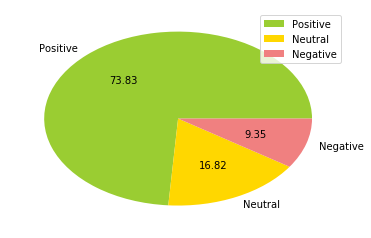

In [68]:
colors = ['yellowgreen','gold','lightcoral']
labels = ['Positive','Neutral','Negative']
plt.pie(x,labels=labels ,colors=colors,autopct='%.2f')
plt.legend(loc = 'best')
plt.show()

## Vectorization

In [69]:
x = flipkartreviews2['Words']

In [70]:
cv = CountVectorizer(words).fit(x)

## Sparse matrix form

In [71]:
x = cv.transform(x)

# Naive Bayes classification

Train test split

In [72]:
from sklearn.model_selection import train_test_split

In [73]:
y = flipkartreviews2["Sentiment_Polarity"]

In [74]:
#train = 67,test = 33
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.33)

## Multinomial Naive bayes model

In [75]:
from sklearn.naive_bayes import MultinomialNB
nb = MultinomialNB()

In [76]:
nb.fit(x_train, y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [77]:
prediction = nb.predict(x_test)

In [78]:
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import accuracy_score

In [79]:
print(confusion_matrix(y_test, prediction))
print('\n')
print(classification_report(y_test, prediction))
print('\n')
print("The Accuracy of the model is",accuracy_score(y_test, prediction, normalize = True)*100,"%")

[[ 0  3  0]
 [ 0 89  0]
 [ 0  8 32]]


             precision    recall  f1-score   support

         -1       0.00      0.00      0.00         3
          0       0.89      1.00      0.94        89
          1       1.00      0.80      0.89        40

avg / total       0.90      0.92      0.90       132



The Accuracy of the model is 91.66666666666666 %


/home/bharath/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
